In [7]:
import os
import pickle
import torch
import numpy as np
from math import ceil
from model_vc import Generator


def pad_seq(x, base=32):
    len_out = int(base * ceil(float(x.shape[0])/base))
    len_pad = len_out - x.shape[0]
    assert len_pad >= 0
    return np.pad(x, ((0,len_pad),(0,0)), 'constant'), len_pad

device = 'cpu'
G = Generator(16,256,512,16).eval().to(device)

# g_checkpoint = torch.load('./../model_inference_state_dict',map_location=torch.device('cpu'))
G = torch.load("./../model_train.pt", map_location=torch.device('cpu')).eval()

In [3]:
import matplotlib.pyplot as plt

(701, 80)


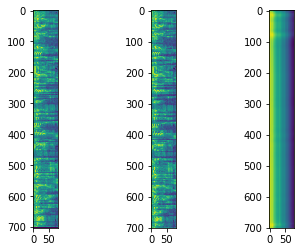

In [6]:
metadata = pickle.load(open('test_metadata2.pkl', "rb"))

spect_vc = []

for sbmt_i in metadata:
    
    # source spectrogram
    x_org = sbmt_i[2]
    x_org, len_pad = pad_seq(x_org)
    # source content
    uttr_org = torch.from_numpy(x_org[np.newaxis, :, :]).to(device)
    
    # source speaker embedding
    emb_org = torch.from_numpy(sbmt_i[1][np.newaxis, :]).to(device)
    
    for sbmt_j in metadata:
        fig, ax = plt.subplots(1,3)
        ax[0].imshow(x_org)
        ax[1].imshow(sbmt_j[2])
        # target speaker embedding
        emb_trg = torch.from_numpy(sbmt_j[1][np.newaxis, :]).to(device)
        
        with torch.no_grad():
            _, x_identic_psnt, _ = G(uttr_org, emb_org, emb_trg)
            
        if len_pad == 0:
            uttr_trg = x_identic_psnt[0, 0, :, :].cpu().numpy()
        else:
            uttr_trg = x_identic_psnt[0, 0, :-len_pad, :].cpu().numpy()
        print(uttr_trg.shape)
        ax[2].imshow(uttr_trg)
        
        spect_vc.append( ('{}x{}'.format(sbmt_i[0], sbmt_j[0]), uttr_trg) )
        break
    break
        
# with open('results_test2.pkl', 'wb') as handle:
#     pickle.dump(spect_vc, handle)          